<a href="https://colab.research.google.com/github/mekhiya/pytorch-playground/blob/main/01_pytorch_workflow_All_togather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cuda


In [ ]:
!nvidia-smi

Sat Nov  4 09:32:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    35W /  70W |    855MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
steps = 0.02

X = torch.arange(start,end,steps).unsqueeze(dim=1)
y = weight * X + bias
# X[:10], y[:10]


In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Plot prediction function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

In [ ]:
# plot_predictions();

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

#    def forward(self, x: torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)

 # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

#from torch.optim import optimizer ???

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 200

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval()

  # 1. Forward pass
  with torch.inference_mode():
    test_pred = model_1(X_test)

    # 2. Calculae the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0 :
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss 0.5739762187004089
Epoch: 10 | Train Loss: 0.439968079328537 | Test Loss 0.4392664134502411
Epoch: 20 | Train Loss: 0.3247582018375397 | Test Loss 0.30455657839775085
Epoch: 30 | Train Loss: 0.20954833924770355 | Test Loss 0.16984669864177704
Epoch: 40 | Train Loss: 0.09433845430612564 | Test Loss 0.03513690456748009
Epoch: 50 | Train Loss: 0.023886388167738914 | Test Loss 0.04784907028079033
Epoch: 60 | Train Loss: 0.019956795498728752 | Test Loss 0.045803118497133255
Epoch: 70 | Train Loss: 0.016517987474799156 | Test Loss 0.037530567497015
Epoch: 80 | Train Loss: 0.013089174404740334 | Test Loss 0.02994490973651409
Epoch: 90 | Train Loss: 0.009653178043663502 | Test Loss 0.02167237363755703
Epoch: 100 | Train Loss: 0.006215683650225401 | Test Loss 0.014086711220443249
Epoch: 110 | Train Loss: 0.00278724217787385 | Test Loss 0.005814164876937866
Epoch: 120 | Train Loss: 0.0012645035749301314 | Test Loss 0.013801801018416882
Epoch:

In [ ]:
# Turn model into evaluation mode

model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

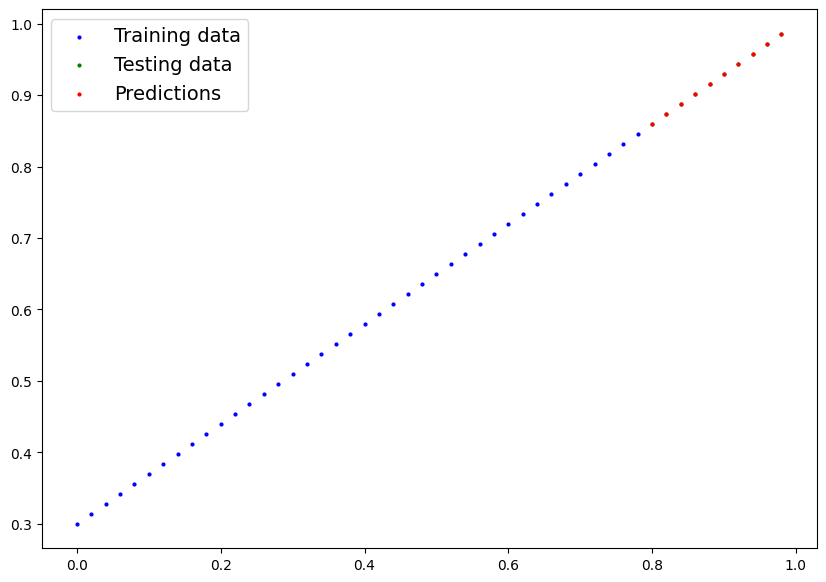

In [ ]:
plot_predictions(predictions=y_pred.cpu())

In [ ]:
from pathlib import Path

# 1. Create models directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# instantiate a fresh instance of LinearRegressionModeV2

loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device


In [ ]:
# Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')